## Importing ICD10, SurgeryGroup and NA parts preprocessed data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('trainvisualz.csv')
df = raw_df.copy()
df.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,L00-L99,C,Spinal Anestezi,Pilonidal kist,26,MALE,Genel Cerrahi,5,13,6333
1,1104,N00-N99,C,Spinal Anestezi,NaN,24,MALE,Uroloji,15,3,2972
2,1850,K00-K95,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,Genel Cerrahi,36,14,4647
3,1059,M00-M99,B,Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,Ortopedi,42,6,4871
4,608,M00-M99,A3,Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,Ortopedi,42,9,9046


In [3]:
df.shape

(2758, 11)

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.shape

(2758, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 0 to 2757
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2758 non-null   int64 
 1   DiagnosticICD10Code  2758 non-null   object
 2   SurgeryGroup         2750 non-null   object
 3   AnesthesiaType       2758 non-null   object
 4   SurgeryName          2424 non-null   object
 5   Age                  2758 non-null   int64 
 6   Sex                  2758 non-null   object
 7   Service              2758 non-null   object
 8   DoctorID             2758 non-null   int64 
 9   AnaesthetistID       2758 non-null   int64 
 10  ElapsedTime(second)  2758 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 258.6+ KB


# Visualization Part

## 1. What is the distrubiton structures of Service's Surgery Elapsed Times.
## 2. Which type of anesthesia was used in which service?

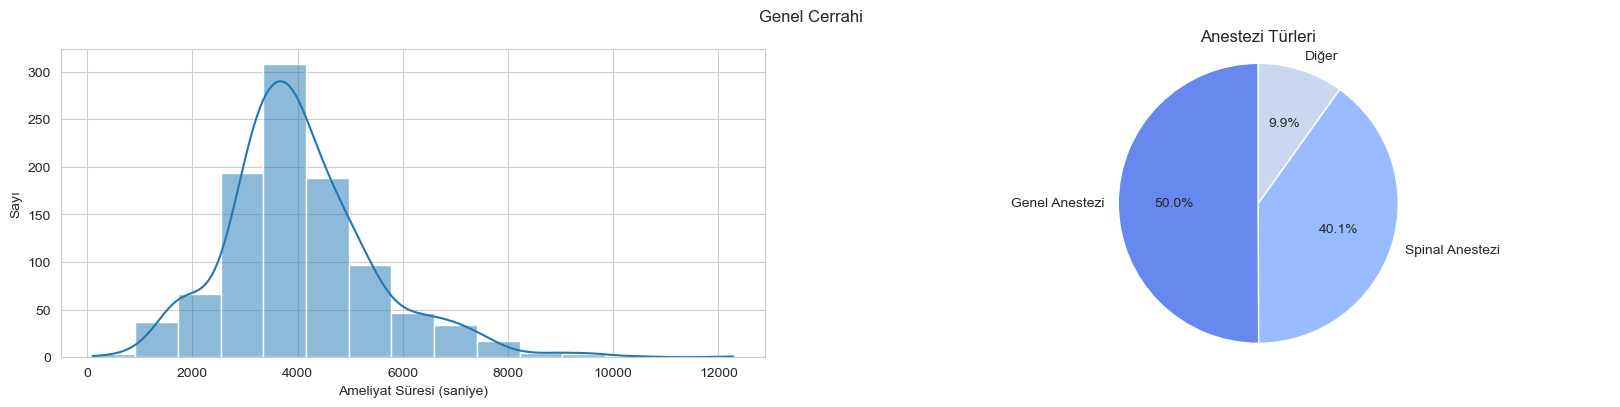

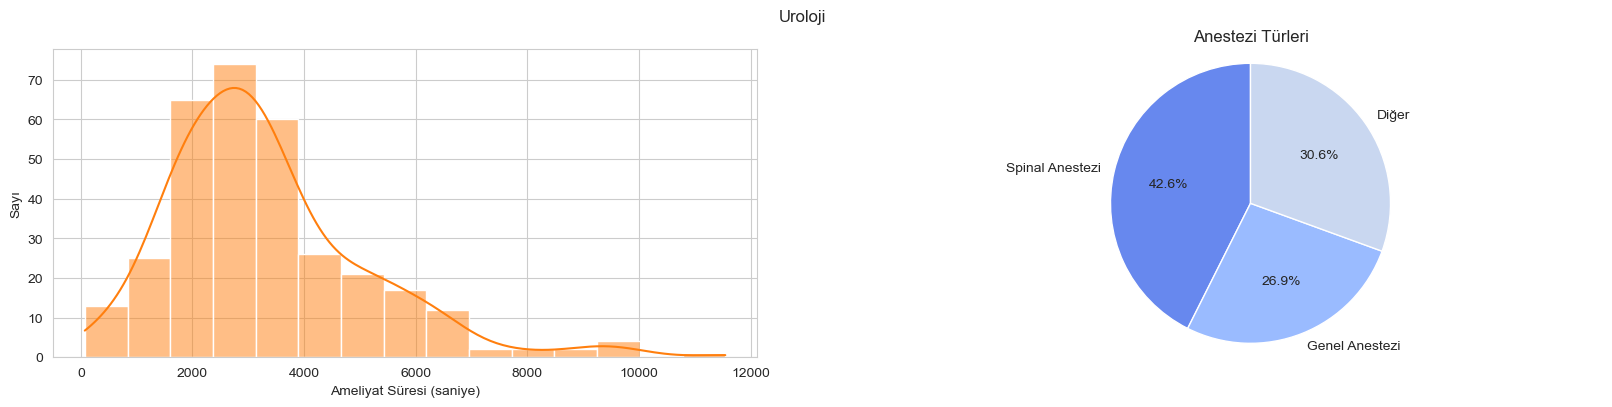

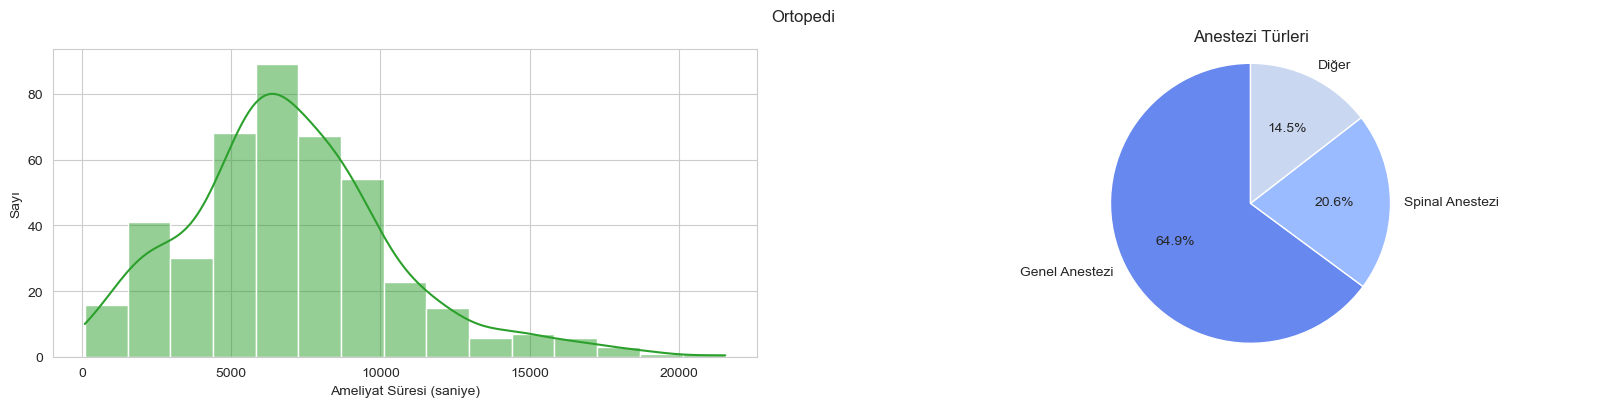

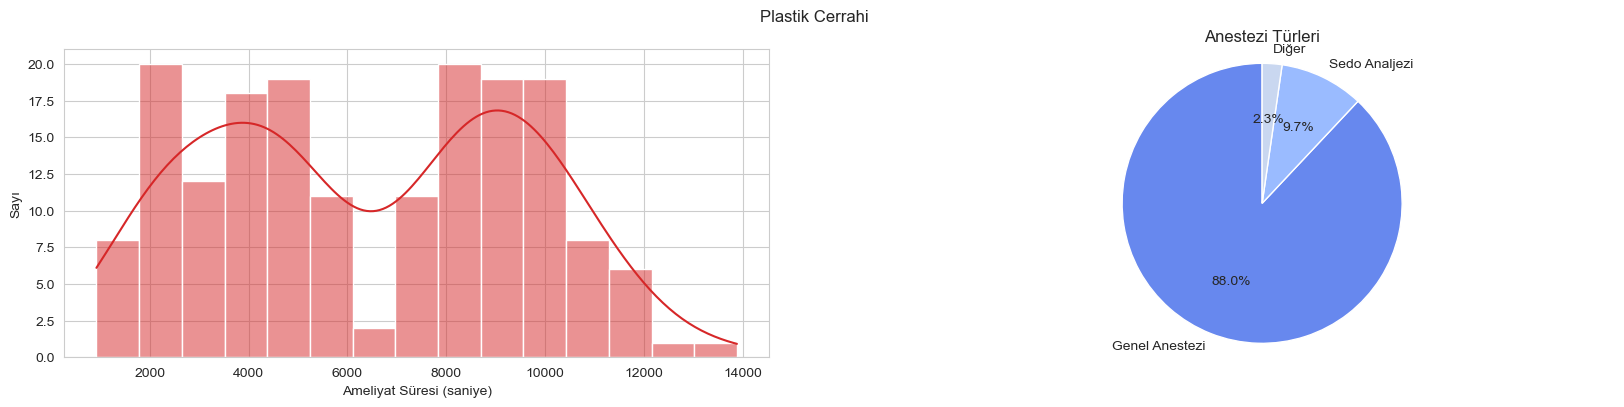

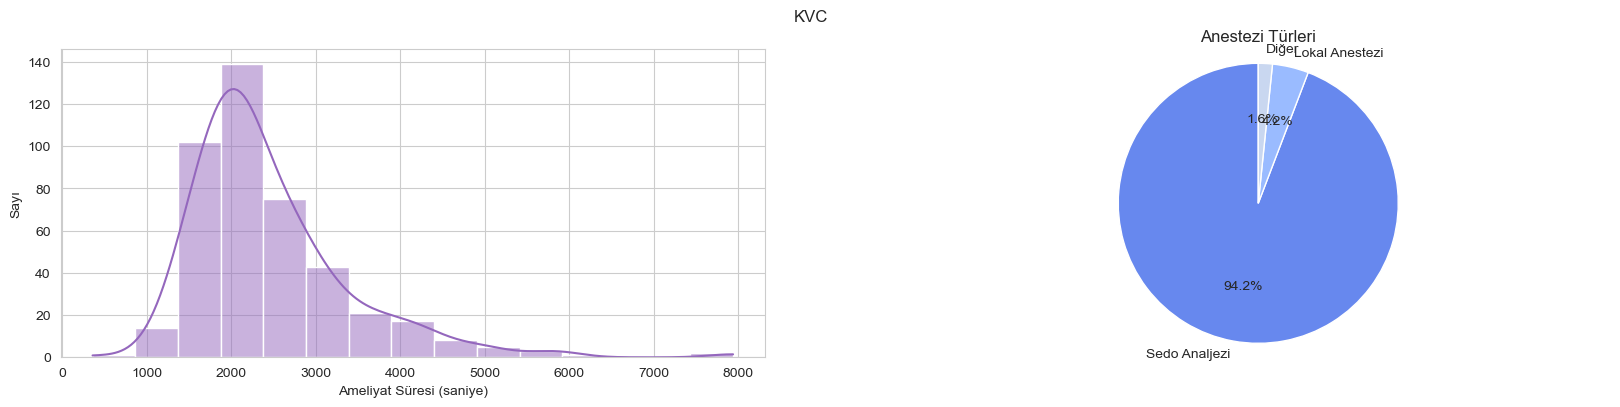

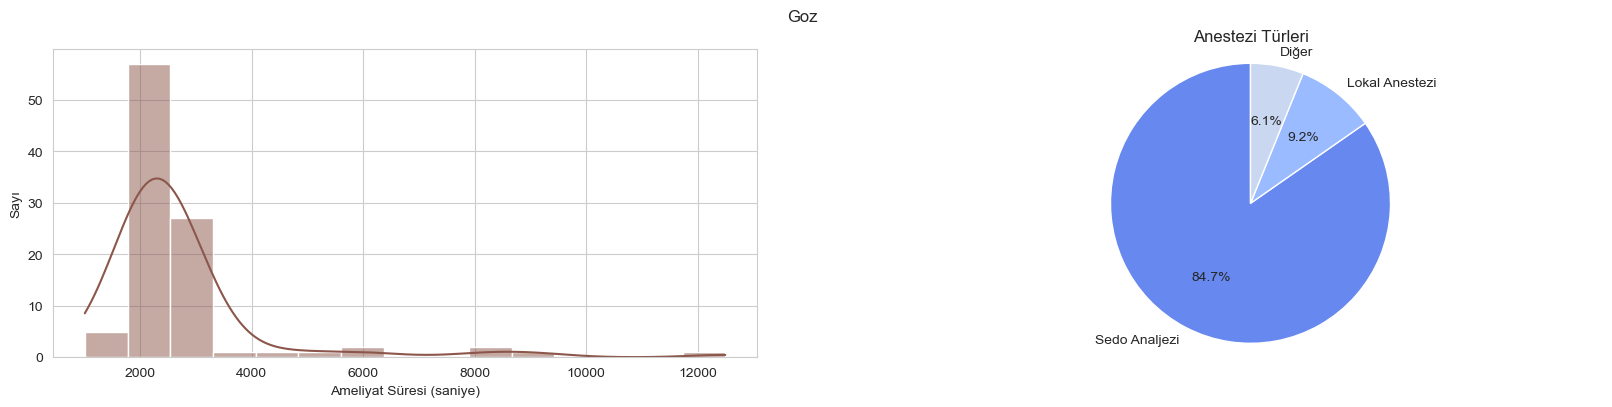

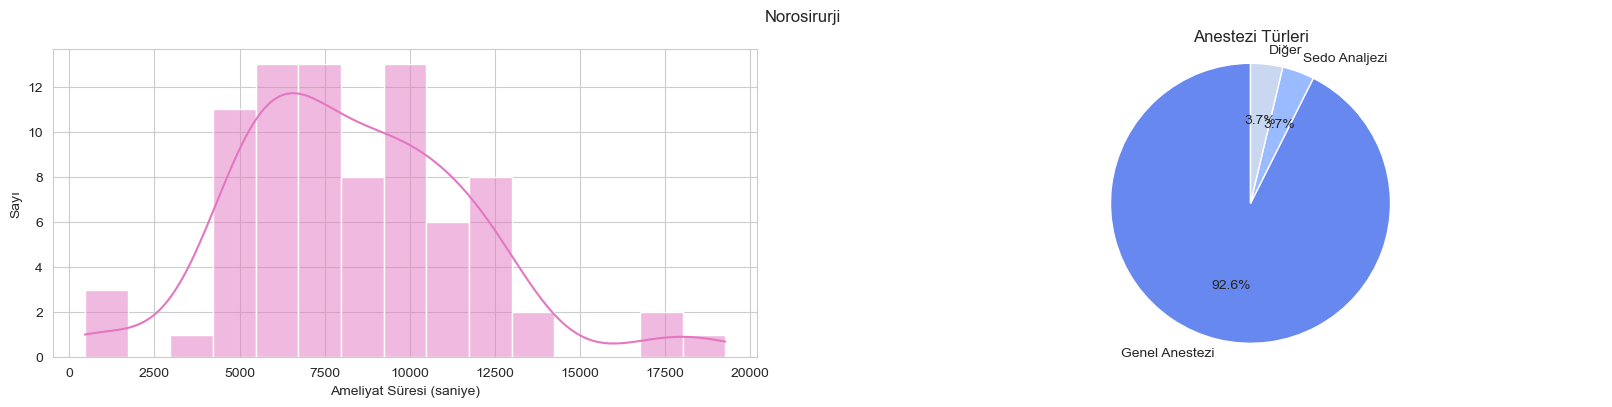

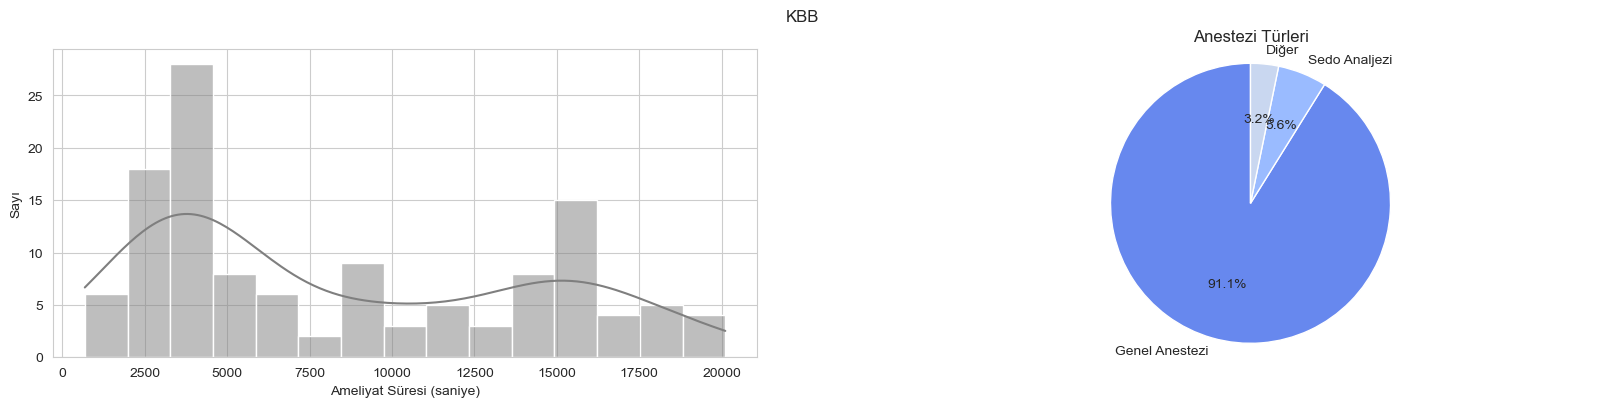

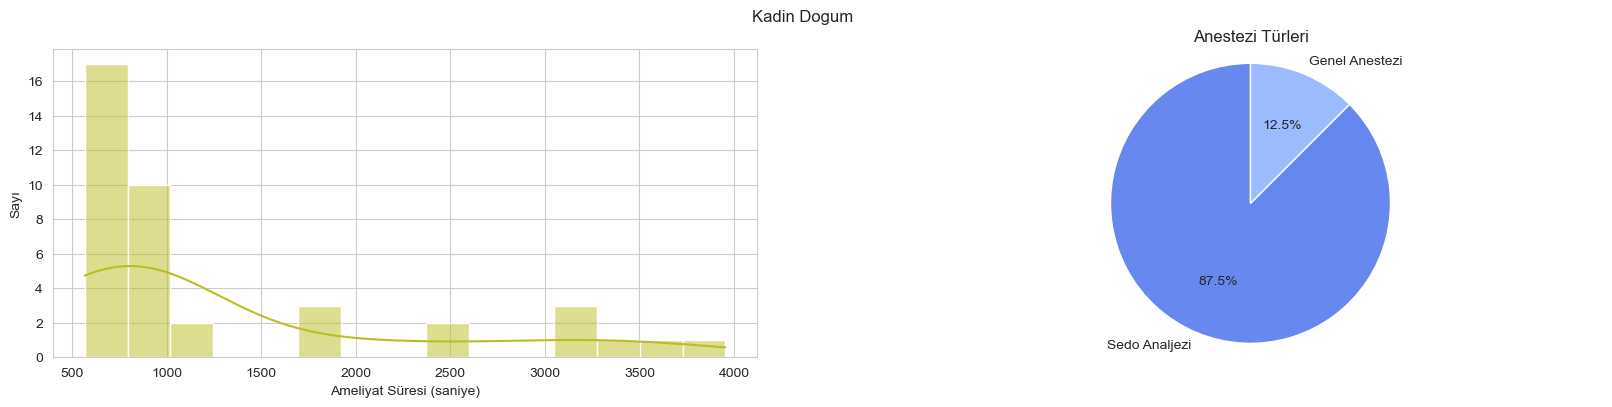

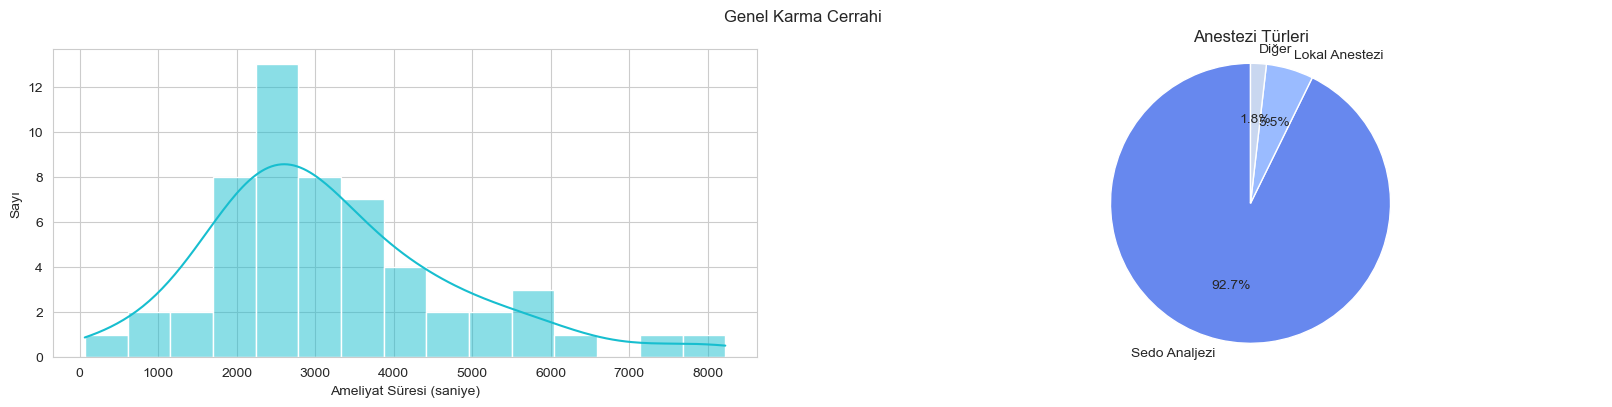

In [36]:

colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']


for i, service in enumerate((df['Service'].unique())):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
    fig.suptitle(service)
    

    data = df[df['Service'] == service]['ElapsedTime(second)']
    

    sns.histplot(data, bins=15, color=colors[i%len(colors)], kde = True, ax = axs[0])
    axs[0].set_xlabel('Ameliyat Süresi (saniye)')
    axs[0].set_ylabel('Sayı')
    

    labels = []
    sizes = []
    

    anes_freq = df[df['Service'] == service]['AnesthesiaType'].value_counts()
    

    labels.append(anes_freq.index[0])
    sizes.append(anes_freq.values[0])
    
    labels.append(anes_freq.index[1])
    sizes.append(anes_freq.values[1])
    

    other_freq = anes_freq.iloc[2:].sum()
    
    if other_freq > 0:
        labels.append('Diğer')
        sizes.append(other_freq)
        
    palette_color = sns.color_palette('coolwarm')
    axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=palette_color)
    axs[1].axis('equal')
    axs[1].set_title('Anestezi Türleri')
    
    plt.show()

## Findings :
1. **In 'Genel Cerrahi Servisi', 'Genel Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

2. **In 'Uroloji', 'Spinal Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

3. **In 'Ortopedi', 'Genel Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

4. **In 'Plastik Cerrahi', 'Genel Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is 2-peak normal distribution.**
5. **In 'KVC', 'Sedo Analjezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

6. **In 'Goz Hastaliklari Servisi', 'Sedo Analjezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

7. **In 'Norosiruji', 'Genel Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries maybe we can say it is normal distribution.**

8. **In 'KBB', 'Genel Anestezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is 2-peak normal distribution.**

9. **In 'Kadın Dogum Servisi', 'Sedo Analjezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can not see any distribution type.**

10. **In 'Genel Karma Cerrahi Servisi', 'Sedo Analjezi' is the most commonly used anesthesia type. When we looked at the elapsed time in surgeries we can say it is normal distribution.**

## Also If we have normal distribution with 1 peak point, all the normal distributions are right skewed. It means **The mean is greater than the median.**

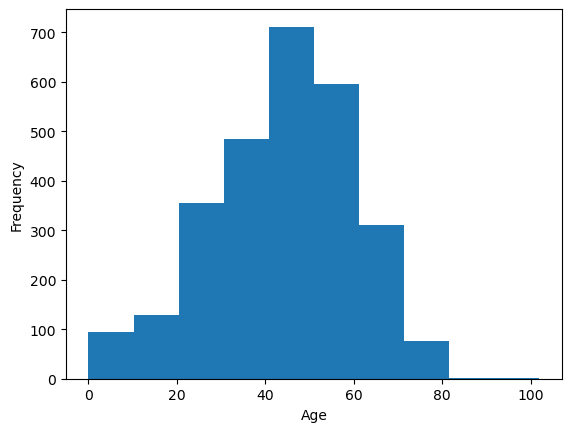

In [9]:
plt.hist(df['Age'])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [11]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 102]
labels = ['[0-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-102]']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

## Age Grouping
1. All independent variables were categorical, except age. Separating the age variable into classes can be efficient for learning.
2. Plotted all the Age intervals. As we can see Age Groups are very evident

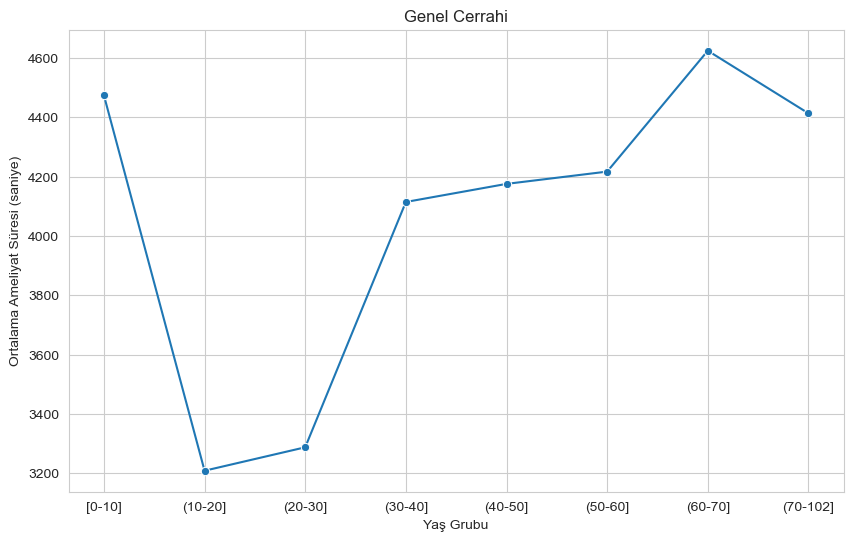

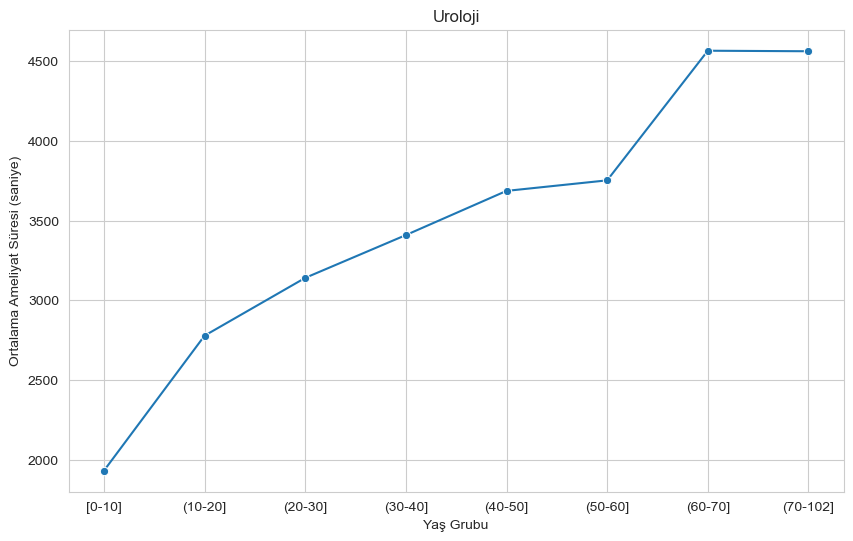

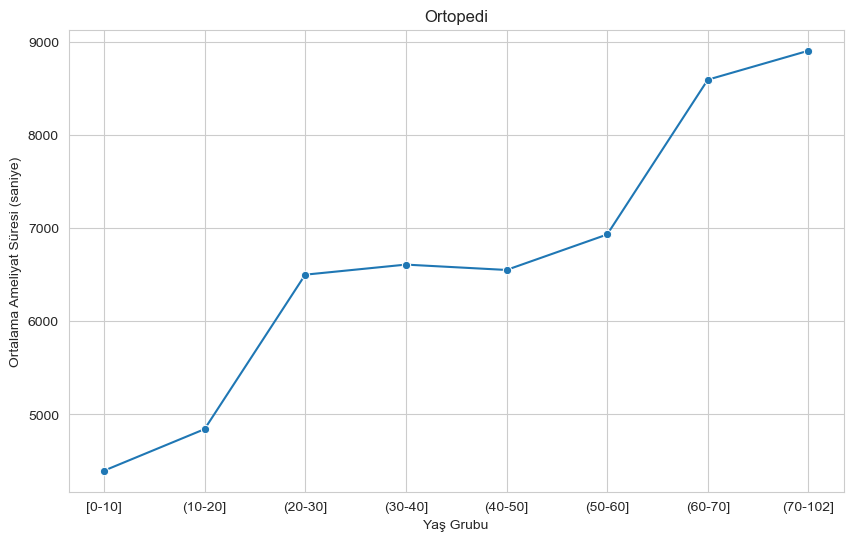

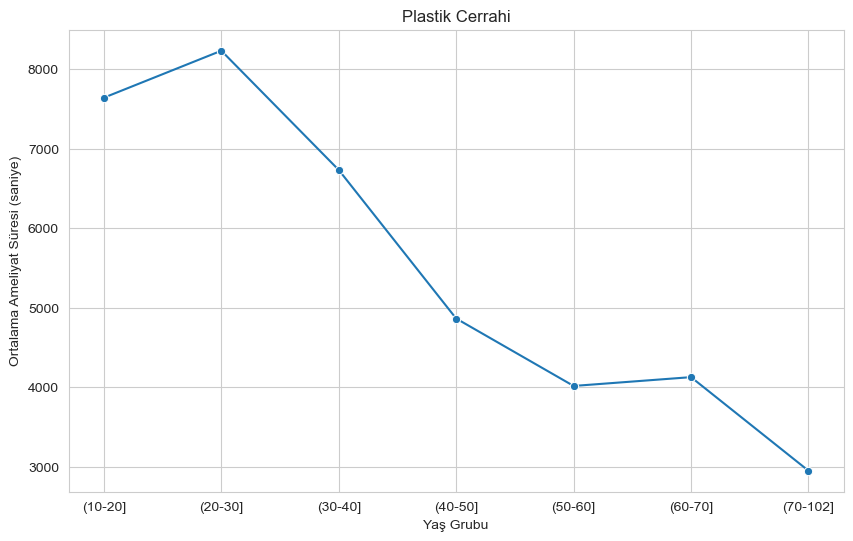

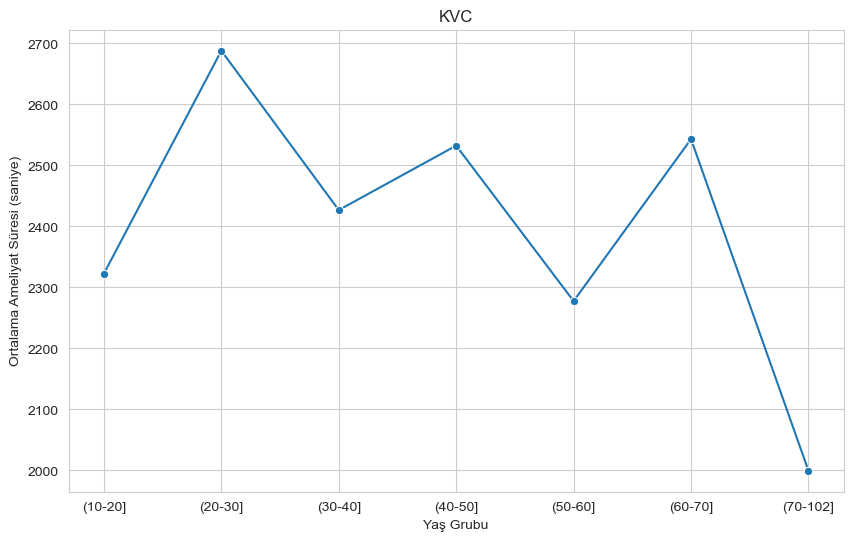

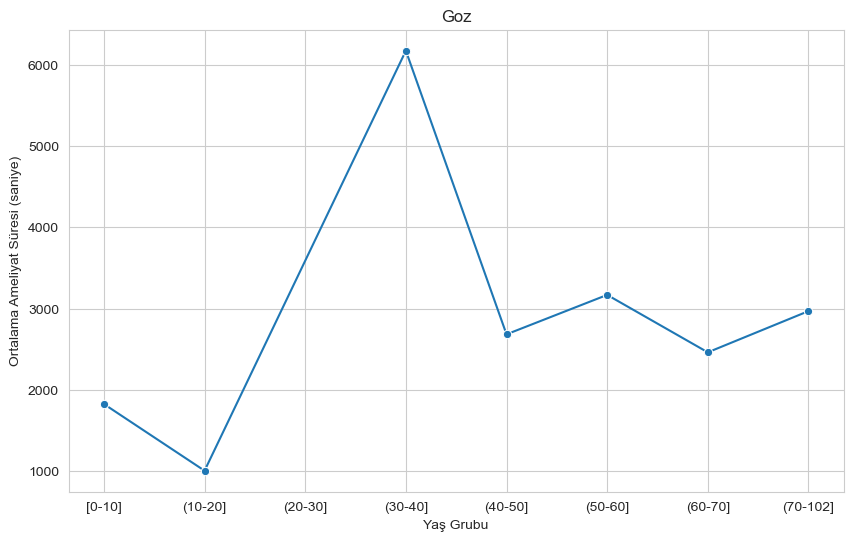

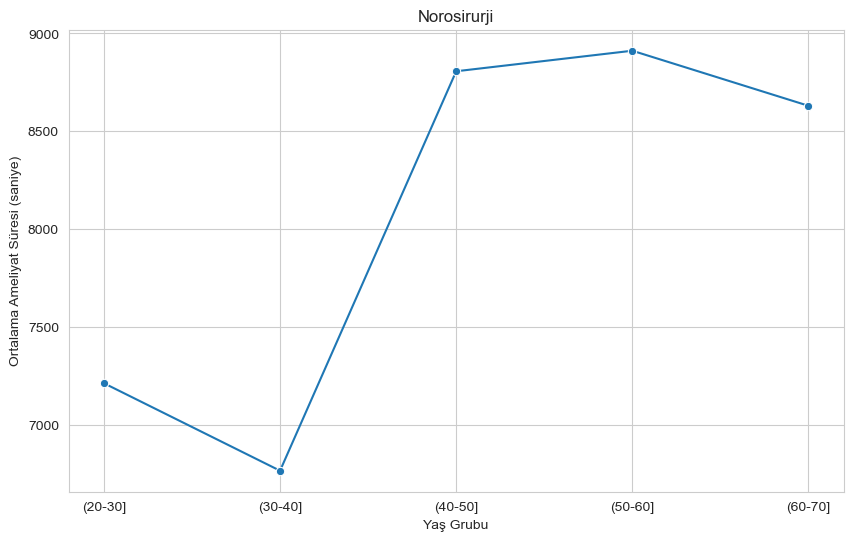

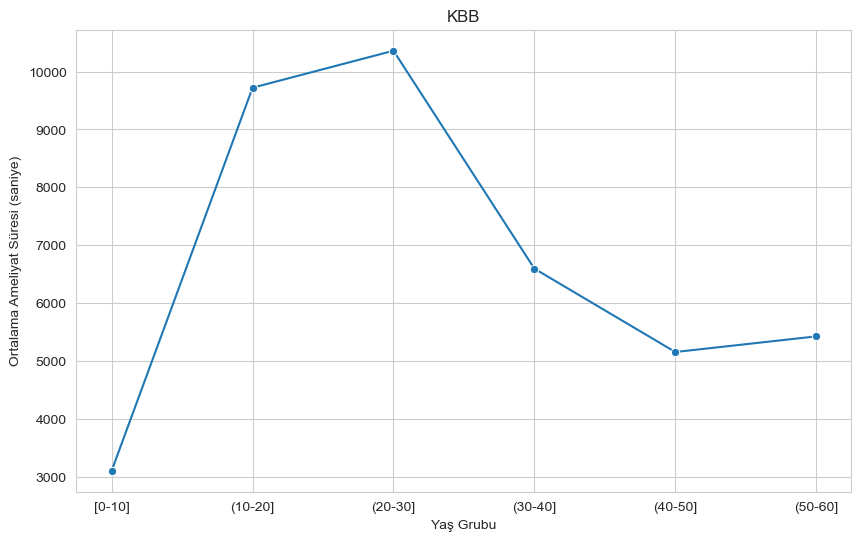

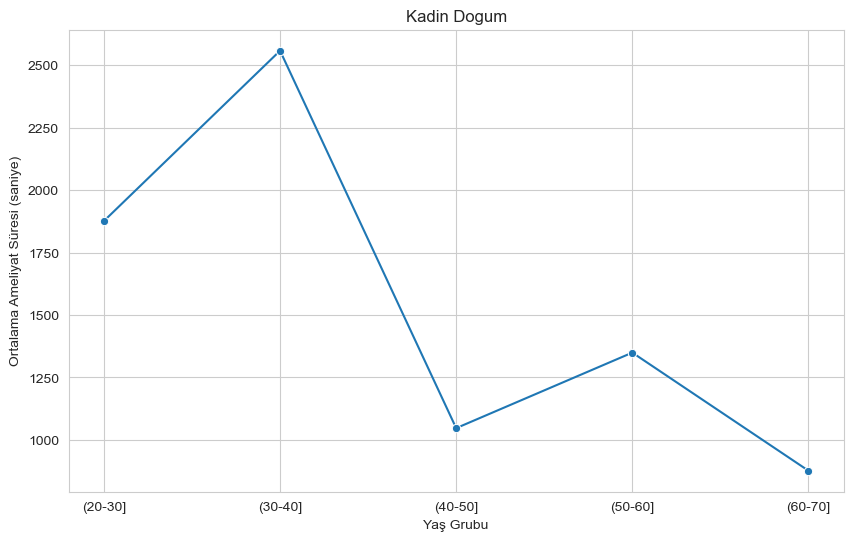

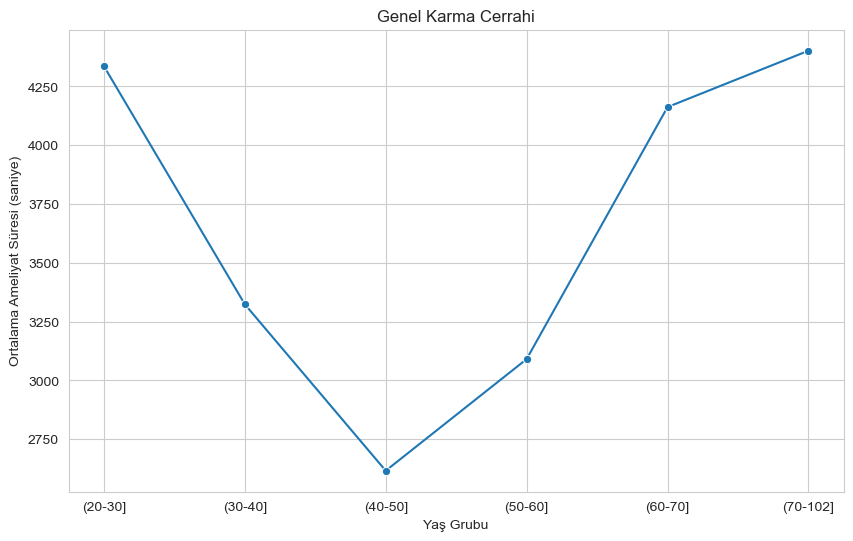

In [39]:
for i, service in enumerate((df['Service'].unique())):

    data = df[df['Service'] == service]
    

    mean_duration = data.groupby('Age_Group')['ElapsedTime(second)'].mean().reset_index()
    

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(10, 6))
    

    sns.lineplot(x='Age_Group', y='ElapsedTime(second)', data=mean_duration, marker='o', color='tab:blue', ci = None)
    

    ax.set_title(service)
    ax.set_xlabel('Yaş Grubu')
    ax.set_ylabel('Ortalama Ameliyat Süresi (saniye)')

    plt.show()

## Age Grouping Insights in Service Layer

**We can see from above how long the age group stayed in the surgery in which service.**

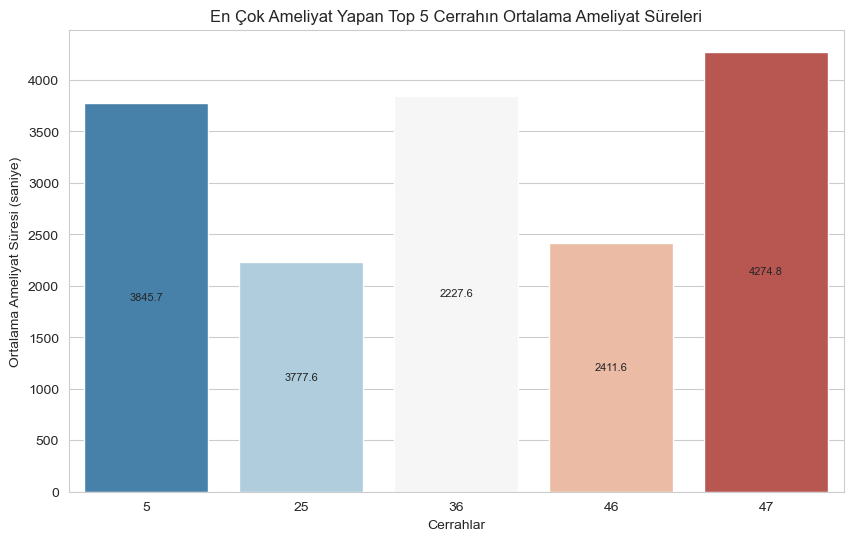

In [28]:
doctor_count = df.groupby('DoctorID')['ElapsedTime(second)'].agg(['count', 'mean'])

top_doctors = doctor_count.sort_values('count', ascending=False).head(5)

plt.figure(figsize=(10,6))

ax = sns.barplot(x=top_doctors.index, y='mean', data=top_doctors, palette='RdBu_r')


plt.xlabel('Cerrahlar')
plt.ylabel('Ortalama Ameliyat Süresi (saniye)')
plt.title('En Çok Ameliyat Yapan Top 5 Cerrahın Ortalama Ameliyat Süreleri')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, labels=[f"{mean:.1f}" for mean in top_doctors['mean']], label_type='center', fontsize=8)

plt.show()

## These are the 5 doctors who have performed the most surgeries.Apparently 47 has the longest operative time of them all.

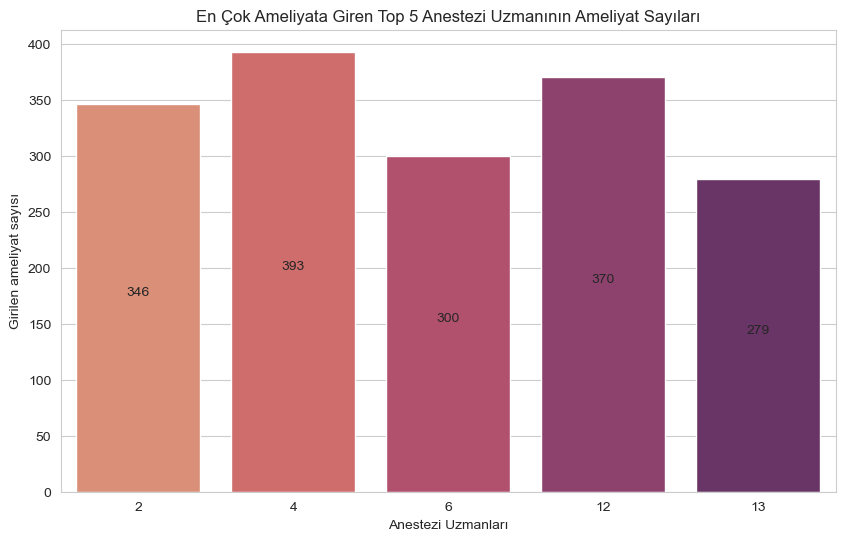

In [14]:
anesthetist_count = df['AnaesthetistID'].value_counts()

top_anesthetists = anesthetist_count.head(5).sort_index()

plt.figure(figsize=(10,6))

ax = sns.barplot(x = top_anesthetists.index, y = top_anesthetists.values, palette='flare')

plt.xlabel('Anestezi Uzmanları')
plt.ylabel('Girilen ameliyat sayısı')
plt.title('En Çok Ameliyata Giren Top 5 Anestezi Uzmanının Ameliyat Sayıları')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, labels=top_anesthetists.values, label_type='center', fontsize=10, padding=4)
    
plt.show()

## What about gender? 

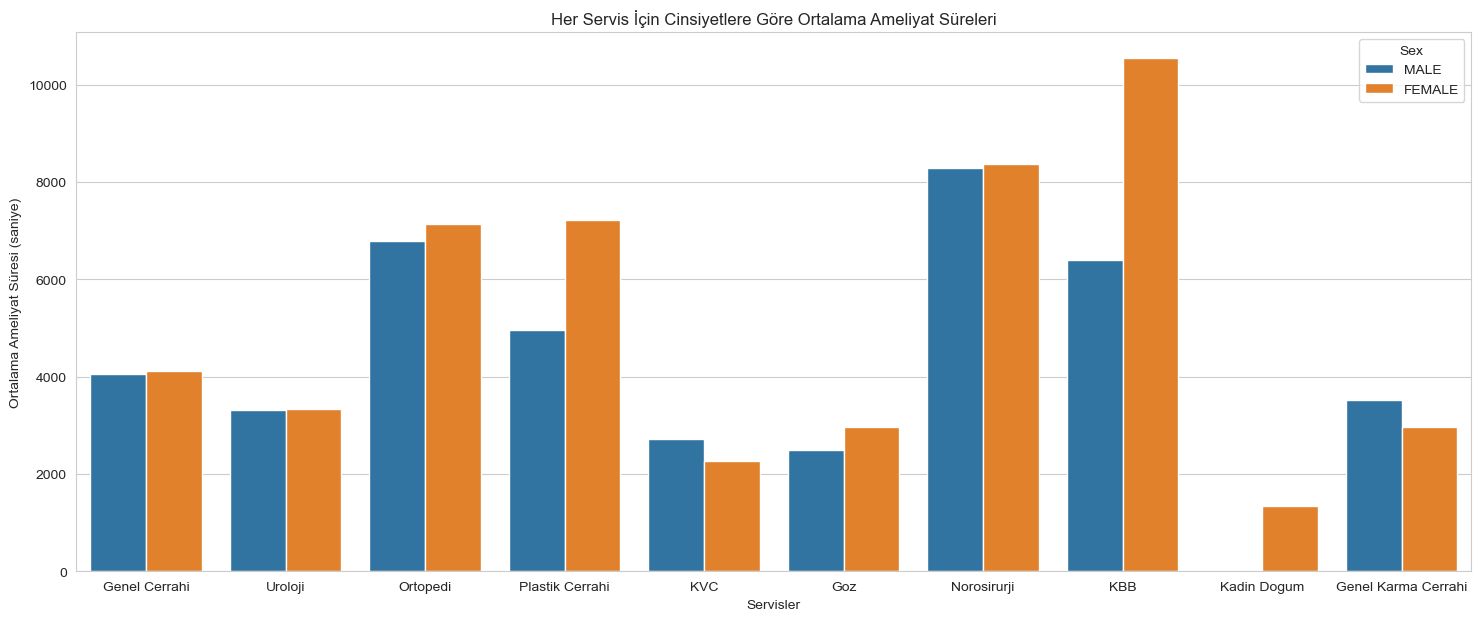

In [17]:
plt.figure(figsize=(18,7))

sns.barplot(x="Service", y="ElapsedTime(second)", hue="Sex", data=df, ci = None)

plt.xlabel("Servisler")
plt.ylabel("Ortalama Ameliyat Süresi (saniye)")
plt.title("Her Servis İçin Cinsiyetlere Göre Ortalama Ameliyat Süreleri")

plt.show()

## There are some certain peeks in some bar graphs. Suspicious about outliers!

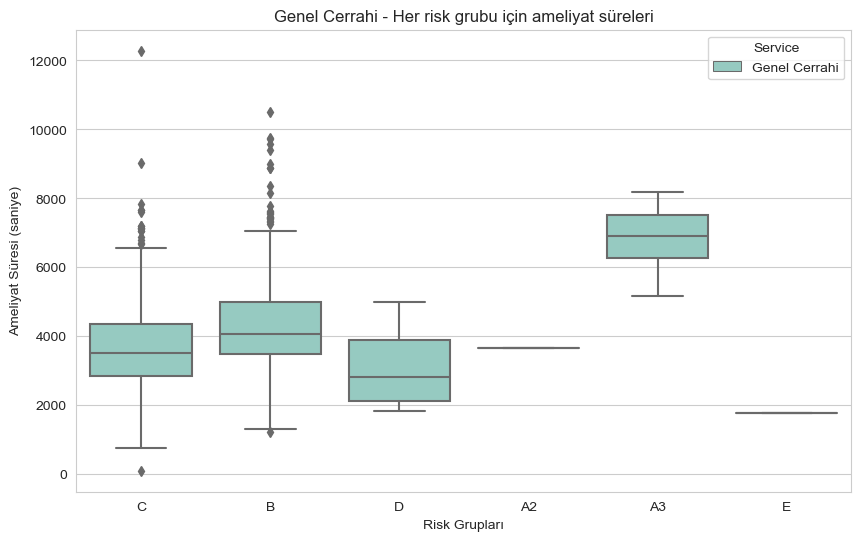

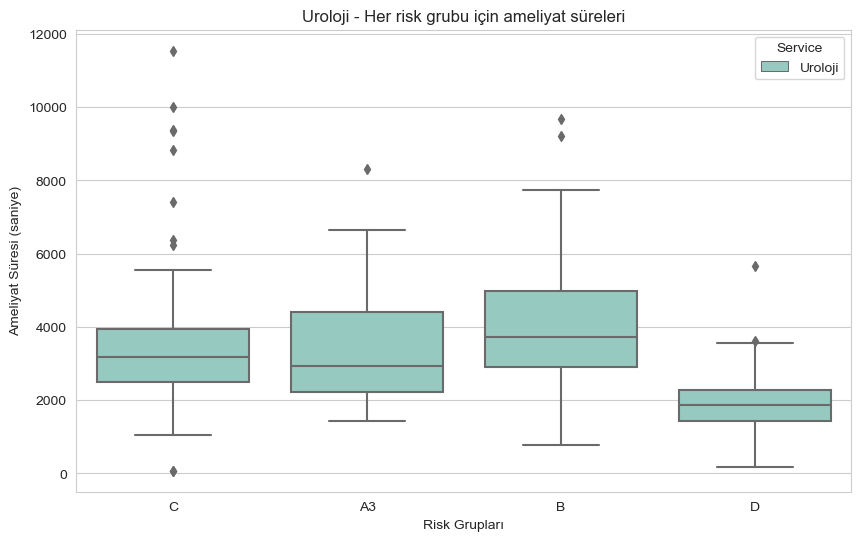

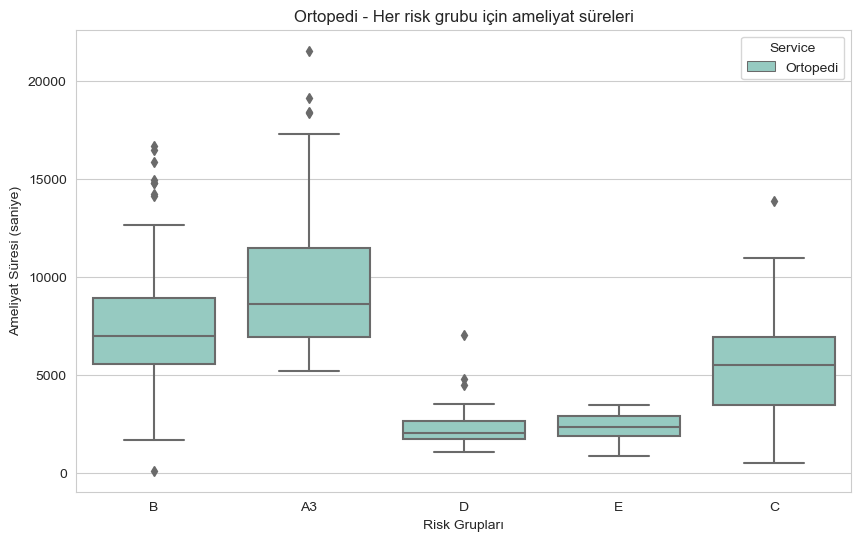

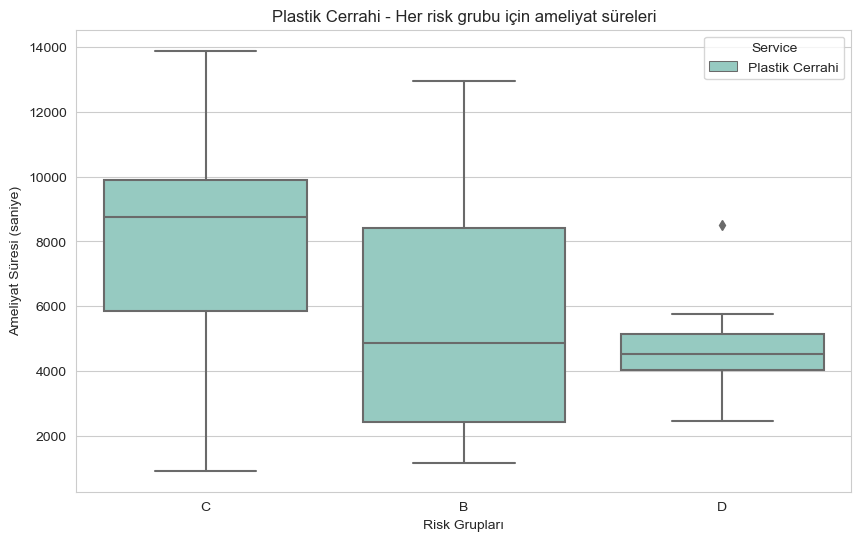

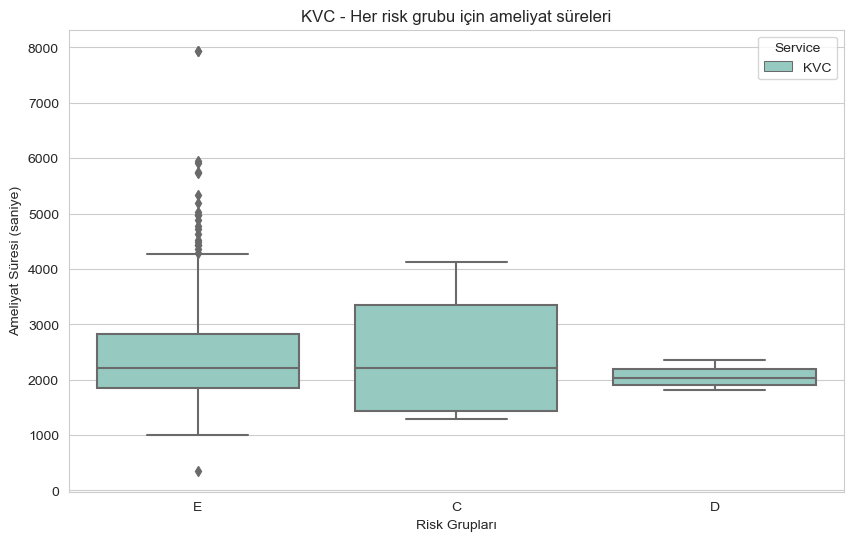

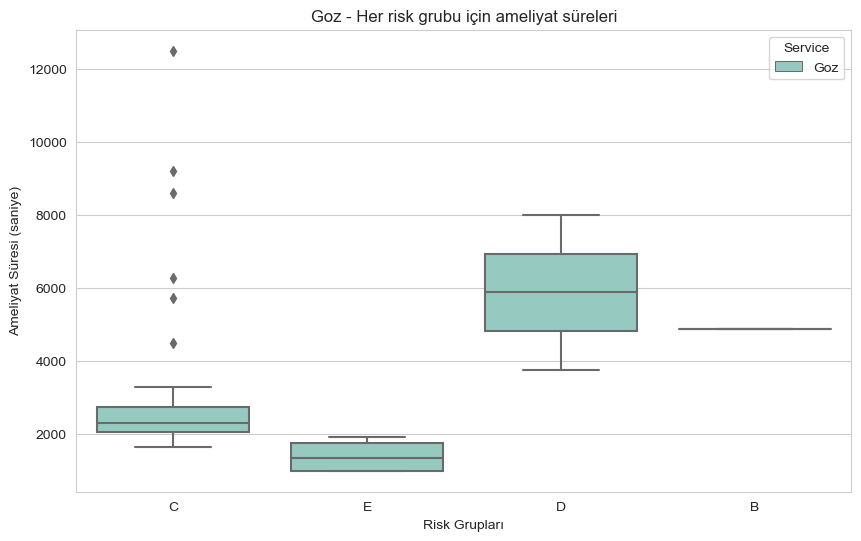

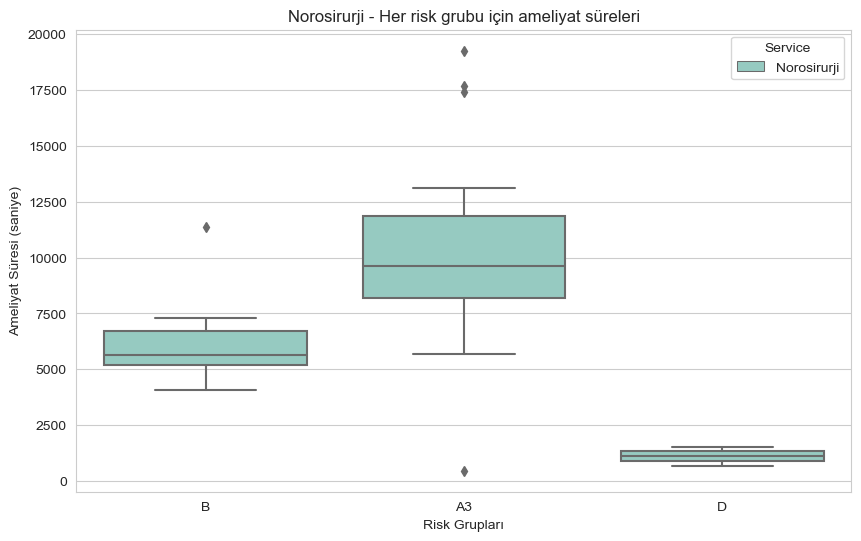

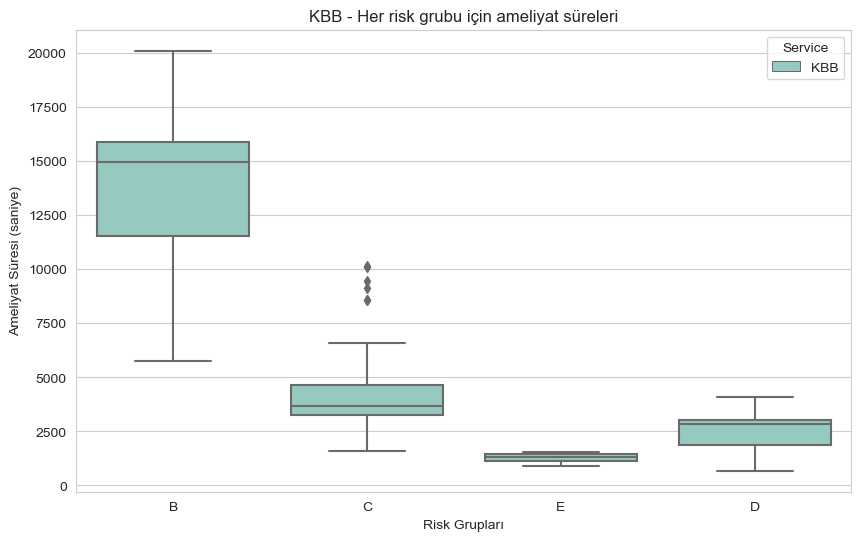

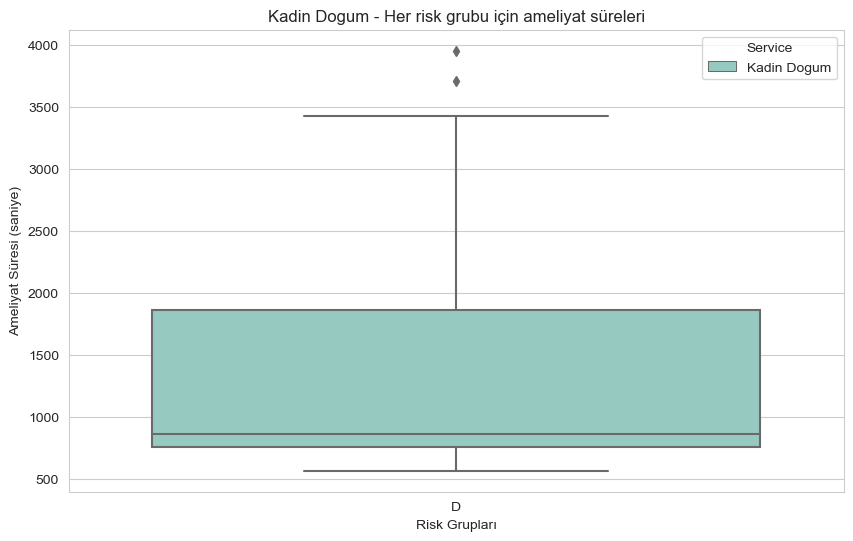

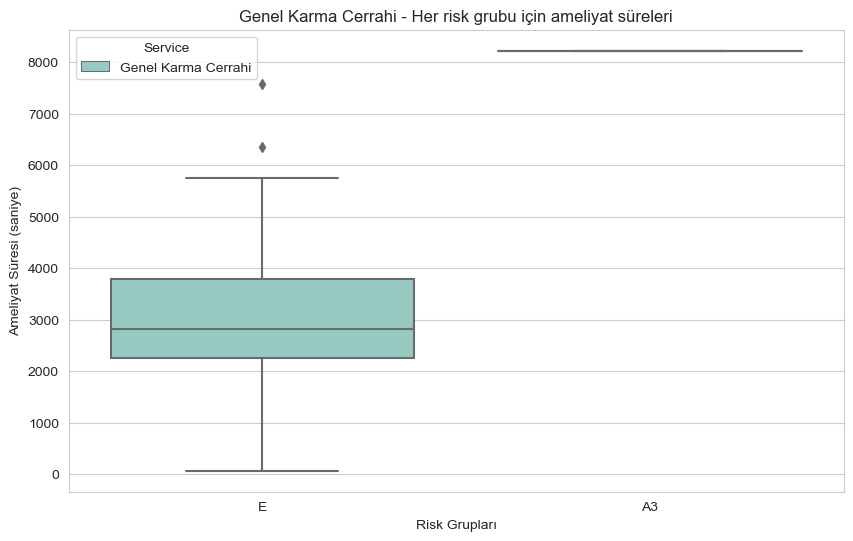

In [18]:
service_list = df['Service'].unique()

for service in service_list:
    filtered_data = df[df['Service'] == service]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    sns.boxplot(x="SurgeryGroup", y="ElapsedTime(second)", hue="Service", data=filtered_data, palette="Set3", dodge=True)
    
    ax.set_xlabel("Risk Grupları")
    ax.set_ylabel("Ameliyat Süresi (saniye)")
    ax.set_title(f"{service} - Her risk grubu için ameliyat süreleri")
    
    plt.show()

## Diagnoses in Service Layer

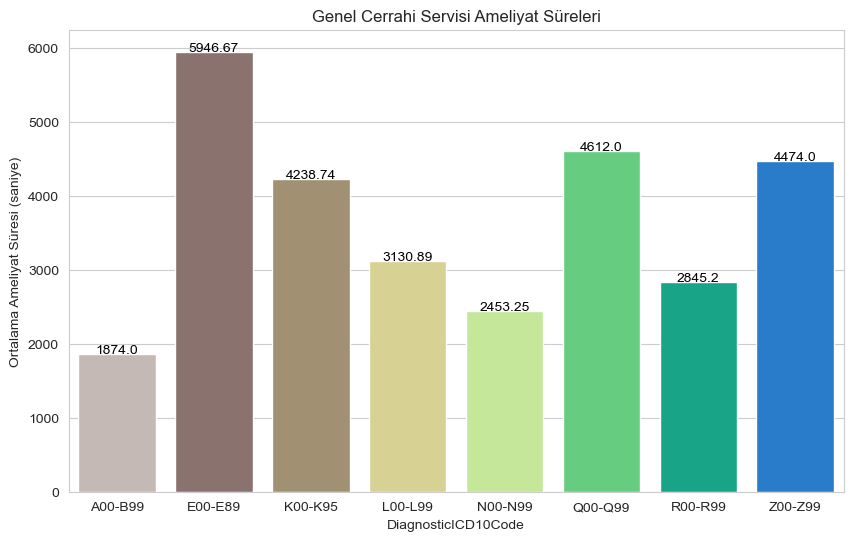

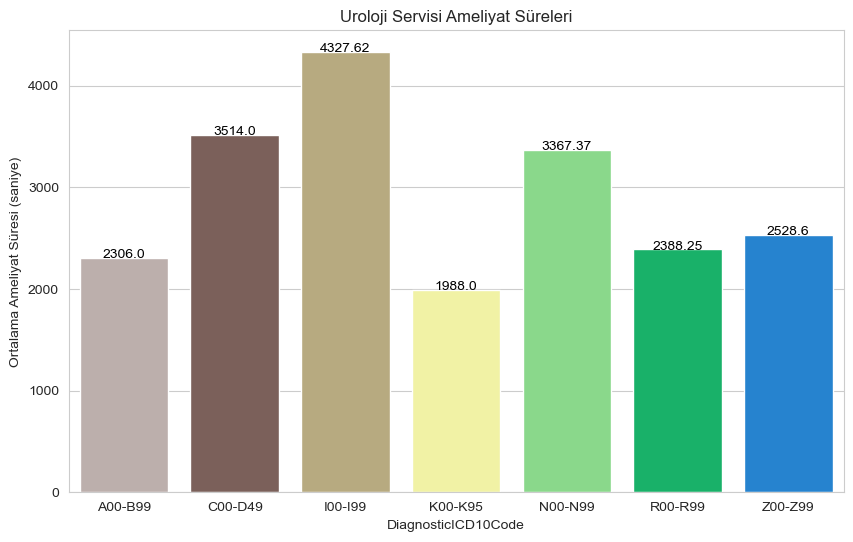

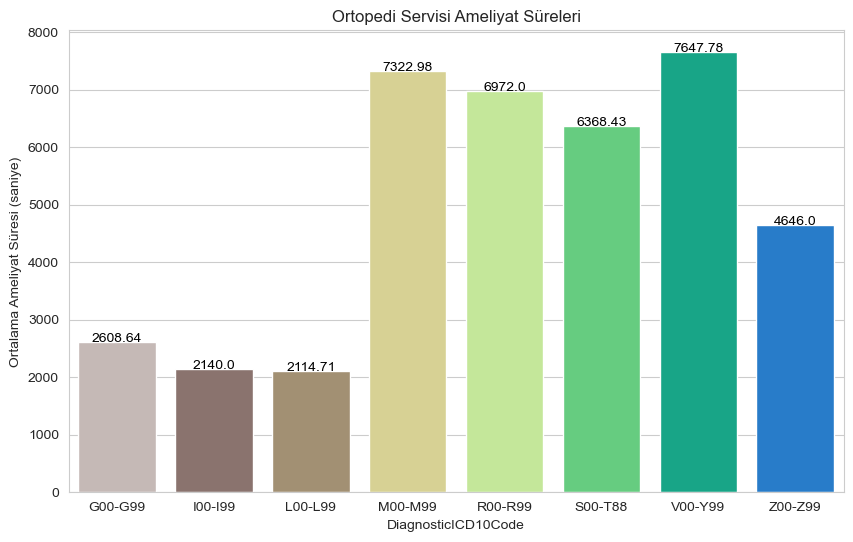

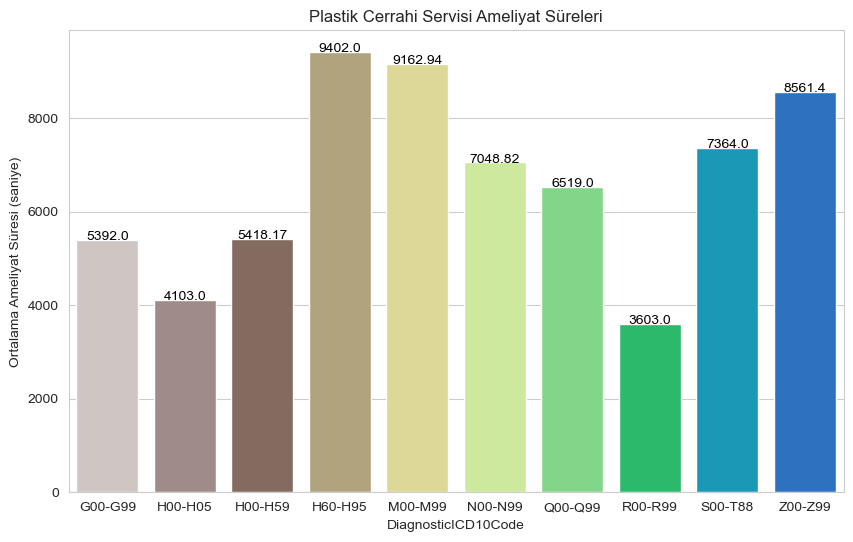

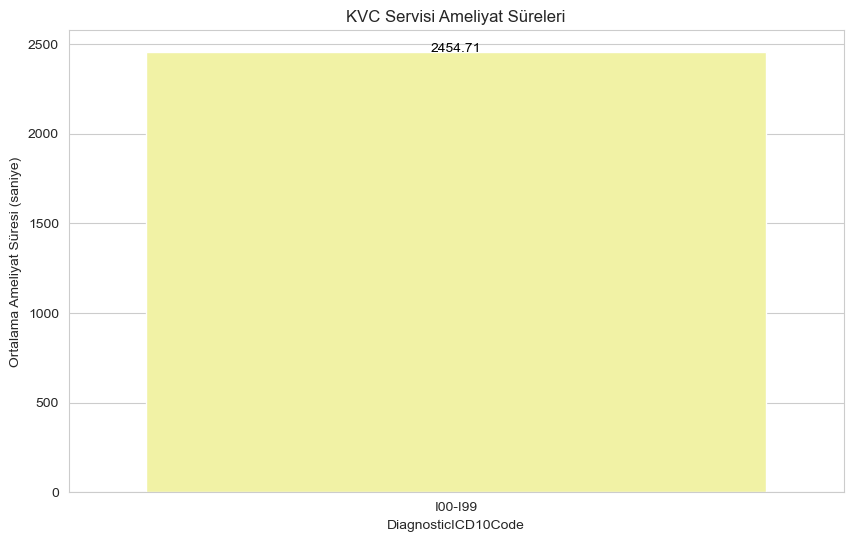

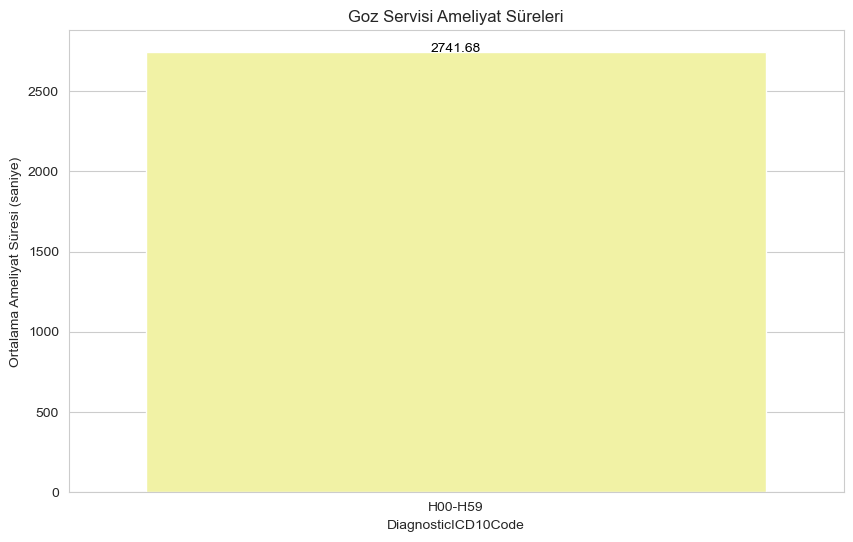

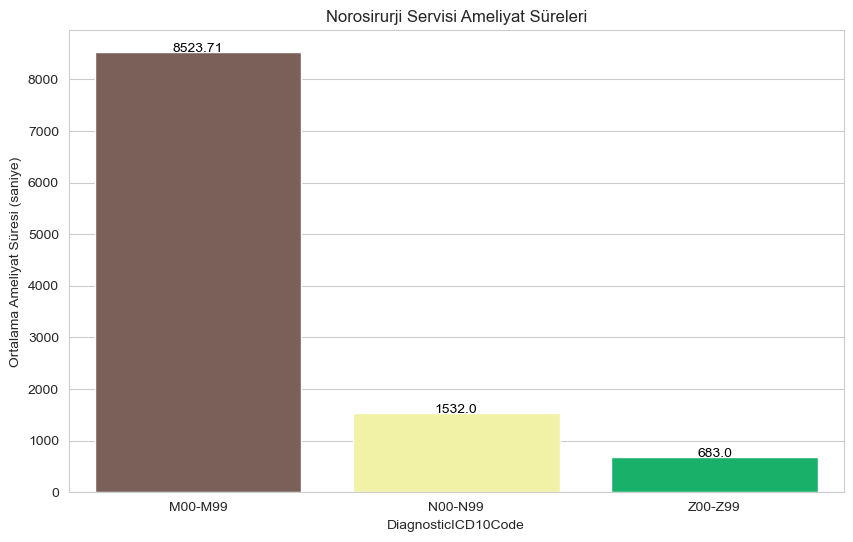

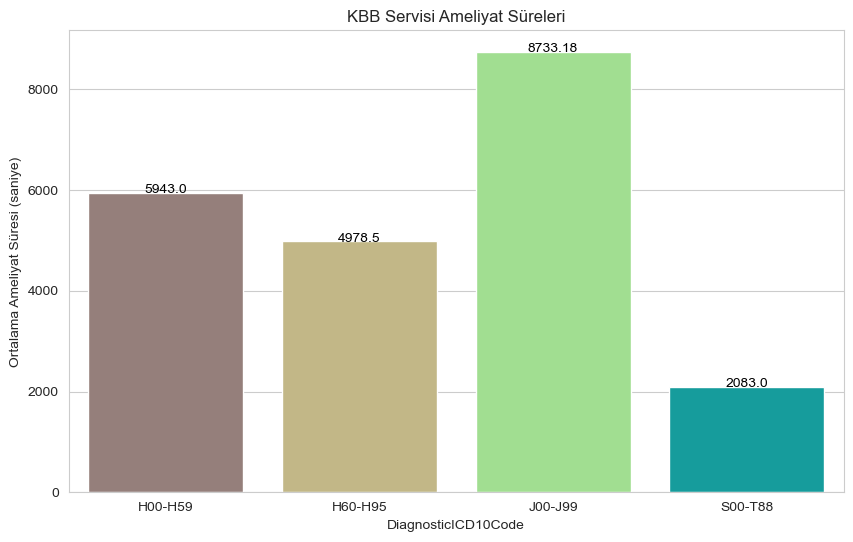

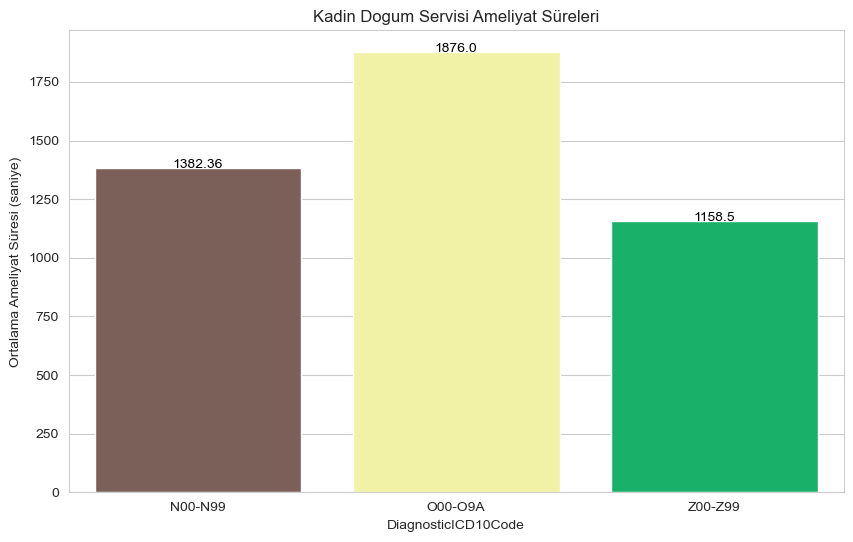

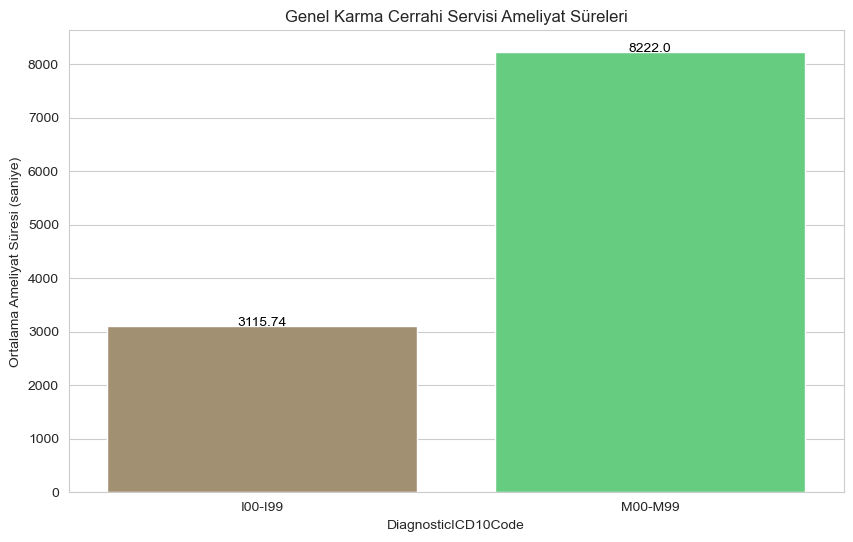

In [42]:
services = df['Service'].unique()

for service in services:
    
    service_data = df.loc[df['Service'] == service]
    
    grouped_data = service_data.groupby('DiagnosticICD10Code')['ElapsedTime(second)'].mean().reset_index()
    
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(10, 6))
    
    ax = sns.barplot(x='DiagnosticICD10Code', y='ElapsedTime(second)', data=grouped_data, palette = 'terrain_r')
    
    plt.title(f'{service} Servisi Ameliyat Süreleri')
    plt.xlabel('DiagnosticICD10Code')
    plt.ylabel('Ortalama Ameliyat Süresi (saniye)')
    
    for index, row in grouped_data.iterrows():
        ax.text(index, row['ElapsedTime(second)'], round(row['ElapsedTime(second)'], 2), color='black', ha="center")

    plt.show()

## Anesthesia Type vs Time

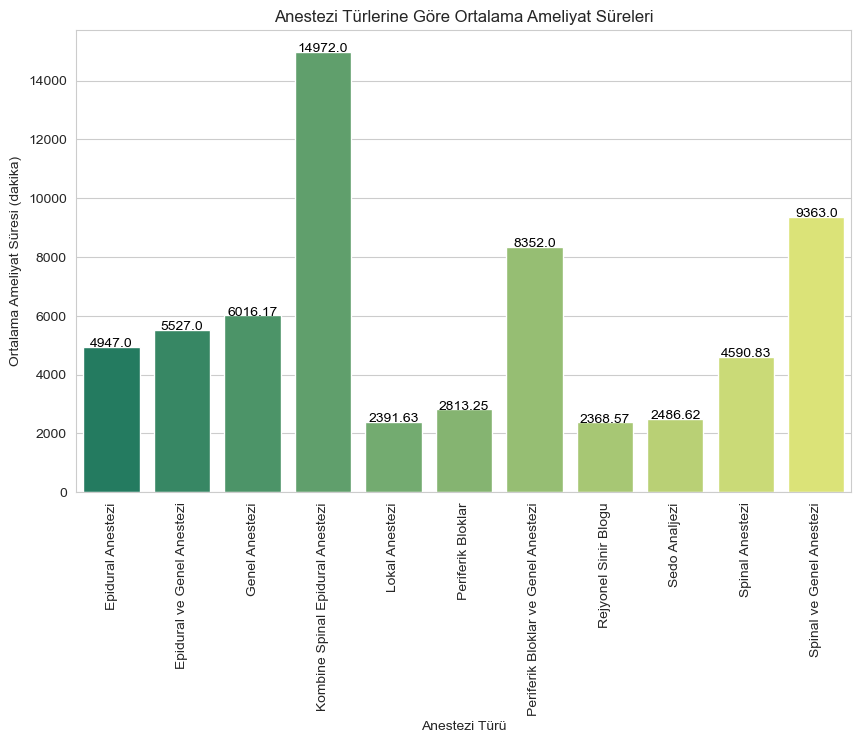

In [45]:
anesthesia_data = df.groupby('AnesthesiaType')['ElapsedTime(second)'].mean().reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))


ax = sns.barplot(x='AnesthesiaType', y='ElapsedTime(second)', data=anesthesia_data, palette = 'summer')

plt.title('Anestezi Türlerine Göre Ortalama Ameliyat Süreleri')
plt.xlabel('Anestezi Türü')
plt.xticks(rotation=90)
plt.ylabel('Ortalama Ameliyat Süresi (dakika)')

for index, row in anesthesia_data.iterrows():
    ax.text(index, row['ElapsedTime(second)'], round(row['ElapsedTime(second)'], 2), color='black', ha="center")
plt.show()

## Modeling Part

1. **Before modeling, classed all the ICD 10 codes for upper diagnose group like If we have 'J39', grouped it like 'J00-J99'.**
2. **Every Surgery Group set up a higher value in their classes. For example If we have 'B,C,A3' --> 'A3'.**
3. **Imputed all the outliers with their mean values in Service layer.**
4. **Did not use 'ID', 'SurgeryName', 'AnesthetistID' columns in our Model. Dropped them All.**
5. **For 'Sex' variable used LabelEncoder, For 'SurgeryGroup' variable used OrdinalEncoder and for the other ones used One-Hot Encoding**
6. **Used XGBoost for modeling**
7. **Used Optuna for Tuning**


## Optuna Results

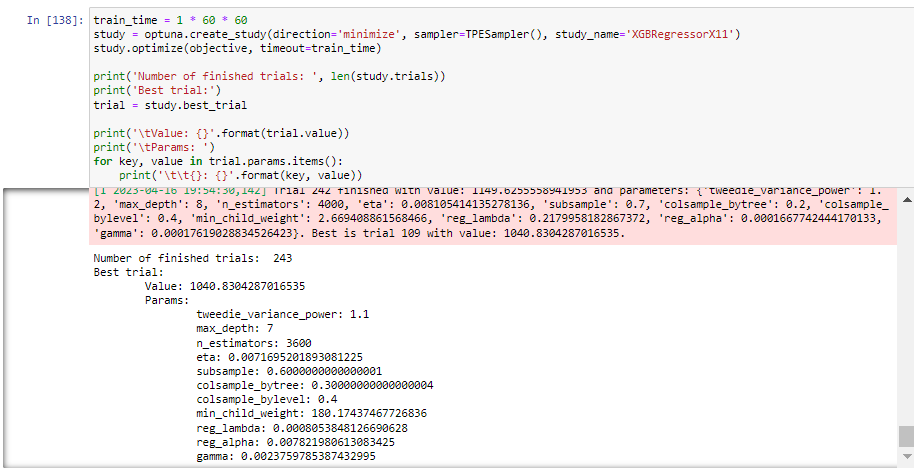

## Learning Curve

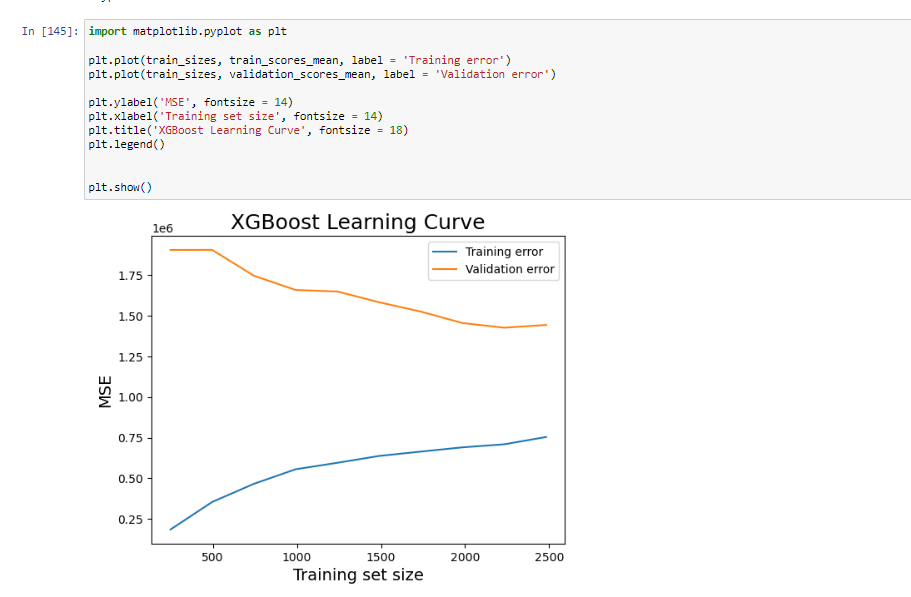

## Evaluating Learning Curve

1. **The XBoost Model got high variance and low bias scenario. It means XGBM model suffers from overfitting.**
-----
2. **To overcome this situation we can use more hyperparameter tuning options or we can set different hyperparameter intervals to search. In this instance I used Optuna which is less costly for personal computers. But with better hardware we can use GridSearchCV for optimum results.**
-----
3. **Adding more instances to train data might be more clever choice compare to tuning but in our case we can not add more instances.**
-----
4. **We can change regularization range, maybe we can increase it to decrease variance and increase bias.**
-----
5. **We can also decrease number of features or feature's dimensions. Used DoctorID like whole and it might be make more complex the model. We can decrease that feature's dimension by Service Layer maybe works. Another thing, maybe we can change ICD10 column's structure, I generalized like 'K00-K99' but I may have lost information.**
-----
6. **Last thing to do is changing algorithm. We can try different algorithm to see how performs our data in these algorithms.**

## Bonus Question - Mathematical Model

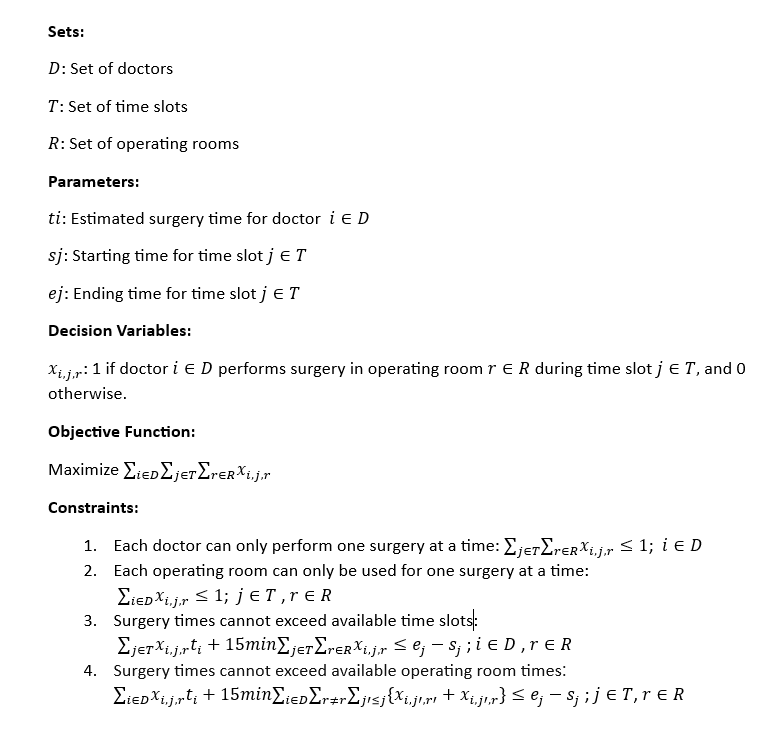

## Closing Statement

**Thank you for these challenging questions. Waiting feedbacks from you.**

[Erkut Koral LinkedIn](https://www.linkedin.com/in/erkutkoral/) /
erkut.koral@gmail.com